### This is title

In [1]:
from pathlib import Path

import  pandas as pd
import numpy as np
# import ulmo

In [2]:
output_dname = r"Z:\TSH\DD274_NABat\CNHP_data_processing\Derived\2016_output"
out_dir = Path(output_dname)

In [3]:
site_md_fname = r"F:\CO_NABat\CO NABAT 2016 Bulk_Stationary_Acoustic_Template.csv"
site_md = pd.read_csv(site_md_fname, skiprows=[1], parse_dates=['First Monitoring Night', 'Fourth Monitoring Night'])
site_md = site_md.rename({'Grts Id':'GridCellID', 'Location Name':'SiteID'}, axis=1)

site_md = site_md.set_index(['GridCellID', 'SiteID'], drop=False)

from pyproj import Proj, transform

inProj = Proj(init='epsg:26913')
outProj = Proj(init='epsg:4326')

def utm_to_wgs84(row):    
    x1,y1 = row['UTME'], row['UTMN']
    x2,y2 = transform(inProj,outProj,x1,y1)
    return (x2,y2)

site_md['Long'], site_md['Lat'] = zip(*site_md.apply(utm_to_wgs84, axis=1))


site_md.head()

GridCellID SiteID    UTME     UTMN First Monitoring Night  \
GridCellID SiteID                                                              
2          NW               2     NW  170440  4355996             2016-06-30   
           SW               2     SW  174304  4354564             2016-06-30   
           NE               2     NE  176892  4360344             2016-06-30   
           SE               2     SE  178373  4353544             2016-06-30   
61         NE              61     NE  548408  4211808             2016-07-11   

                  Fourth Monitoring Night                       Detector  \
GridCellID SiteID                                                          
2          NW                  2016-07-03     WILDLIFE ACOUSTICS SM2Bat+   
           SW                  2016-07-03     WILDLIFE ACOUSTICS SM2Bat+   
           NE                  2016-07-03     WILDLIFE ACOUSTICS SM2Bat+   
           SE                  2016-07-03     WILDLIFE ACOUSTICS SM2Bat+   
61         NE                  2016-07-14  WILDLIFE ACOUSTICS SM2Bat-192   

                                  Microphone  Microphone Orientation  \
GridCellID SiteID                                                      
2          NW      Wildlife Acoustics SMX-US                     NaN   
           SW      Wildlife Acoustics SMX-US                     NaN   
           NE      Wildlife Acoustics SMX-US                     NaN   
           SE      Wildlife Acoustics SMX-US                     NaN   
61         NE      Wildlife Acoustics SMX-US                     NaN   

                   Microphone Height (meters)  \
GridCellID SiteID                               
2          NW                             2.0   
           SW                             2.0   
           NE                             2.0   
           SE                             2.0   
61         NE                             3.0   

                   Distance to Nearest Clutter (meters) Clutter Type  \
GridCellID SiteID                                                      
2          NW                                       NaN   vegetation   
           SW                                       NaN   vegetation   
           NE                                       NaN   vegetation   
           SE                                       NaN   vegetation   
61         NE                                       NaN   vegetation   

                   Distance to Nearest Water (meters)  Water Type  \
GridCellID SiteID                                                   
2          NW                                     NaN         NaN   
           SW                                     NaN         NaN   
           NE                                     NaN         NaN   
           SE                                     NaN         NaN   
61         NE                                     NaN         NaN   

                   Percent Clutter Broad Habitat Type  \
GridCellID SiteID                                       
2          NW                  NaN          shrubland   
           SW                  NaN          shrubland   
           NE                  NaN          shrubland   
           SE                  NaN          shrubland   
61         NE                  NaN            prairie   

                  Audio Recording Name (*.wav *.zc) Software Type        Long  \
GridCellID SiteID                                                               
2          NW                                    FS   Sonobat 3.x -108.821023   
           SW                                    FS   Sonobat 3.x -108.775622   
           NE                                    FS   Sonobat 3.x -108.748456   
           SE                                    FS   Sonobat 3.x -108.728060   
61         NE                                    FS   Sonobat 3.x -104.448246   

                         Lat  
GridCellID SiteID             
2          NW      39.290652  
           SW      39.2792

In [4]:
table4 = site_md[['GridCellID', 'SiteID', 'Lat', 'Long', 'Detector', 'Microphone', 'Microphone Orientation', 
                 'Microphone Height (meters)', 'Distance to Nearest Clutter (meters)', 'Clutter Type',  
                 'Distance to Nearest Water (meters)', 'Water Type', 'Percent Clutter',
                 'Broad Habitat Type', 'Audio Recording Name (*.wav *.zc)', 'Software Type']]

table4.head()

GridCellID SiteID        Lat        Long  \
GridCellID SiteID                                             
2          NW               2     NW  39.290652 -108.821023   
           SW               2     SW  39.279238 -108.775622   
           NE               2     NE  39.332177 -108.748456   
           SE               2     SE  39.271585 -108.728060   
61         NE              61     NE  38.052719 -104.448246   

                                        Detector                 Microphone  \
GridCellID SiteID                                                             
2          NW         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   
           SW         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   
           NE         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   
           SE         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   
61         NE      WILDLIFE ACOUSTICS SM2Bat-192  Wildlife Acoustics SMX-US   

                   Microphone Orientation  Microphone Height (meters)  \
GridCellID SiteID                                                       
2          NW                         NaN                         2.0   
           SW                         NaN                         2.0   
           NE                         NaN                         2.0   
           SE                         NaN                         2.0   
61         NE                         NaN                         3.0   

                   Distance to Nearest Clutter (meters) Clutter Type  \
GridCellID SiteID                                                      
2          NW                                       NaN   vegetation   
           SW                                       NaN   vegetation   
           NE                                       NaN   vegetation   
           SE                                       NaN   vegetation   
61         NE                                       NaN   vegetation   

                   Distance to Nearest Water (meters)  Water Type  \
GridCellID SiteID                                                   
2          NW                                     NaN         NaN   
           SW                                     NaN         NaN   
           NE                                     NaN         NaN   
           SE                                     NaN         NaN   
61         NE                                     NaN         NaN   

                   Percent Clutter Broad Habitat Type  \
GridCellID SiteID                                       
2          NW                  NaN          shrubland   
           SW                  NaN          shrubland   
           NE                  NaN          shrubland   
           SE                  NaN          shrubland   
61         NE                  NaN            prairie   

                  Audio Recording Name (*.wav *.zc) Software Type  
GridCellID SiteID                                                  
2          NW                                    FS   Sonobat 3.x  
           SW                                    FS   Sonobat 3.x  
           NE                                    FS   Sonobat 3.x  
           SE                                    FS   Sonobat 3.x  
61         NE                                    FS   Sonobat 3.x

### Let's add some site specific attributes to each of these

In [5]:
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

import rasterio
import rasterstats
from owslib.wcs import WebCoverageService

In [6]:
def calc_tpi(data, size=10):
    max_data = ndi.maximum_filter(data, size=size)
    min_data = ndi.minimum_filter(data, size=size)
    mean_data = ndi.uniform_filter(data, size=size)

    tpi = (mean_data-min_data)/(max_data-min_data)
    return tpi

In [7]:
def calc_tri(data, size=3):
    max_data = ndi.maximum_filter(data, size=size)
    min_data = ndi.minimum_filter(data, size=size)

    tri = np.sqrt(np.absolute((np.square(max_data) - np.square(min_data) )))
    return tri


In [8]:
wcs=WebCoverageService('https://elevation.nationalmap.gov:443/arcgis/services/3DEPElevation/ImageServer/WCSServer',version='1.0.0')

# this is the resolution for 1 arc second (30m DEM)
res = 0.00027777777803598/3

elev=wcs['DEP3ElevationPrototype']


def get_site_elev(row):
    
    lat, long = row['Lat'], row['Long']
    bounds = (long-(10*res)-res/2,  lat-(10*res)-res/2, long+(10*res)+res/2,  lat+(10*res)+res/2)

    
    output = wcs.getCoverage(identifier='DEP3ElevationPrototype', bbox=bounds,
                             format='GeoTIFF', resx=res, resy=res, crs=4326)
    contents = output.read()

    import rasterio
    from rasterio.io import MemoryFile
    elev = MemoryFile(contents).open()
    data = elev.read().squeeze()
    
    point_elevation = data[10, 10]
    point_tpi = calc_tpi(data)[10, 10]
    point_tri = calc_tri(data)[10, 10]
    
    return (point_elevation, point_tpi, point_tri)

get_site_elev(table4.iloc[0])

(1449.9078, 0.60479105, 120.18943)

In [9]:
table4['elevation'], table4['tpi'], table4['tri'] = zip(*table4.apply(get_site_elev, axis=1))

C:\Anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
table4

GridCellID SiteID        Lat        Long  \
GridCellID SiteID                                             
2          NW               2     NW  39.290652 -108.821023   
           SW               2     SW  39.279238 -108.775622   
           NE               2     NE  39.332177 -108.748456   
           SE               2     SE  39.271585 -108.728060   
61         NE              61     NE  38.052719 -104.448246   
           NW              61     NW  38.061467 -104.512655   
           SE              61     SE  38.014977 -104.460525   
           SW              61     SW  38.008945 -104.524736   
157        NE             157     NE  37.860529 -108.435896   
           NW             157     NW  37.885345 -108.465491   
           SE             157     SE  37.862235 -108.353384   
           SW             157     SW  37.860700 -108.435893   
221        E              221      E  37.556925 -108.996175   
           NE             221     NE  37.585943 -108.998736   
           NE2            221    NE2  37.577465 -109.003284   
253        NW             253     NW  40.421876 -103.952328   
           SW             253     SW  40.379807 -103.956561   
306        NE             306     NE  38.221214 -102.168790   
           SE             306     SE  38.152382 -102.150757   
317        NE             317     NE  38.785086 -104.804083   
           NW             317     NW  38.742067 -104.829182   
           SE             317     SE  38.723400 -104.809095   
           SW             317     SW  38.731110 -104.818117   
338        SE             338     SE  40.939646 -103.403666   
           SW             338     SW  40.964201 -103.466009   
381        NE             381     NE  37.682709 -104.747103   
           NW             381     NW  37.679108 -104.842581   
           SE             381     SE  37.646588 -104.757961   
           SW             381     SW  37.656018 -104.837494   
509        SE             509     SE  40.972314 -108.708394   
...                       ...    ...        ...         ...   
2781       NE            2781     NE  37.769462 -107.064574   
2797       NW            2797     NW  37.901891 -105.783417   
           SE            2797     SE  37.837804 -105.742554   
           SW            2797     SW  37.837917 -105.775421   
2834       SW            2834     SW  40.304854 -103.623445   
           SE            2834     SE  40.335595 -103.546394   
           NE            2834     NE  40.372281 -103.543003   
2877       NW            2877     NW  37.923726 -106.230370   
           SW            2877     SW  37.897670 -106.235611   
           NE            2877     NE  37.927387 -106.196114   
2941       NW            2941     NW  40.923614 -106.920920   
           SW            2941     SW  40.894744 -106.908498   
           NE            2941     NE  40.915528 -106.872594   
           SE            2941     SE  40.885405 -106.869312   
3005       SW            3005     SW  40.296933 -105.051960   
           SE            3005     SE  40.309518 -104.970567   
           NE            3005     NE  40.385202 -104.960402   
           NW            3005     NW  40.382898 -105.031998   
3053       SW            3053     SW  37.019837 -105.919396   
           NW            3053     NW  37.080758 -105.879506   
           NE            3053     NE  37.058908 -105.820430   
           SE            3053     SE  37.047911 -105.819165   
3069       NE            3069     NE  40.430000 -108.465995   
           SE            3069     SE  40.397002 -108.453003   
           NW            3069     NW  40.419004 -108.510999   
           SW            3069     SW  40.364004 -108.490997   
3197       SE            3197     SE  37.838292 -103.419673   
           NE            3197     NE  37.867058 -103.417558   
3229       NW            3229     NW  38.666003 -107.891999   
           SW            3229     SW  38.649004 -107.888994   

                                        Detector 

#### Interestingly not a strong correlation between tri and tpi

C:\Anaconda3\envs\pyviz\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


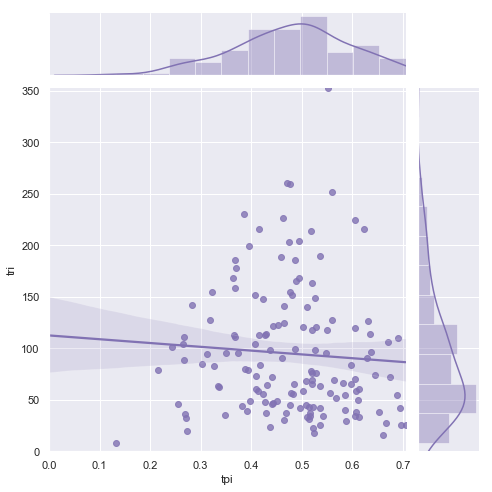

In [11]:
import seaborn as sns
sns.set(style="darkgrid")


g = sns.jointplot("tpi", "tri", data=table4, kind="reg",
                  xlim=(0, table4.tpi.max()), ylim=(0, table4.tri.max()), color="m", height=7);

## Functions for adding NLCD landcover values

In [12]:
# this is a local copy of the 2011 nlcd layer available here: https://www.mrlc.gov/nlcd2011.php
nlcd_fname = r"Y:\Veg_LandCover\NLCD\nlcd11\nlcd_2011_landcover.tif"
nlcd = rasterio.open(nlcd_fname)

In [13]:
nlcd.crs.to_dict()

{'proj': 'aea',
 'lat_1': 29.5,
 'lat_2': 45.5,
 'lat_0': 23,
 'lon_0': -96,
 'x_0': 0,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'm',
 'no_defs': True}

In [14]:
inProj = Proj(init='epsg:4326')
outProj = Proj(nlcd.crs.to_dict())

def wgs84_to_aes(lat, long):    
    x2,y2 = transform(inProj,outProj, long, lat)
    return (x2,y2)


wgs84_to_aes(39.290652, -114.821023)

(-1597933.670830356, 1966238.2312705414)

In [15]:
def get_nlcd(row):
    x, y = wgs84_to_aes(row['Lat'], row['Long'])
    nlcd_value = next(nlcd.sample([(x, y)]))[0]
    return nlcd_value

get_nlcd(table4.iloc[0])

52

In [16]:
table4['nlcd'] = table4.apply(get_nlcd, axis=1)

In [17]:
table4.head(10)

GridCellID SiteID        Lat        Long  \
GridCellID SiteID                                             
2          NW               2     NW  39.290652 -108.821023   
           SW               2     SW  39.279238 -108.775622   
           NE               2     NE  39.332177 -108.748456   
           SE               2     SE  39.271585 -108.728060   
61         NE              61     NE  38.052719 -104.448246   
           NW              61     NW  38.061467 -104.512655   
           SE              61     SE  38.014977 -104.460525   
           SW              61     SW  38.008945 -104.524736   
157        NE             157     NE  37.860529 -108.435896   
           NW             157     NW  37.885345 -108.465491   

                                        Detector                 Microphone  \
GridCellID SiteID                                                             
2          NW         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   
           SW         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   
           NE         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   
           SE         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   
61         NE      WILDLIFE ACOUSTICS SM2Bat-192  Wildlife Acoustics SMX-US   
           NW      WILDLIFE ACOUSTICS SM2Bat-192  Wildlife Acoustics SMX-US   
           SE      WILDLIFE ACOUSTICS SM2Bat-192  Wildlife Acoustics SMX-US   
           SW      WILDLIFE ACOUSTICS SM2Bat-192  Wildlife Acoustics SMX-US   
157        NE         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   
           NW         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   

                   Microphone Orientation  Microphone Height (meters)  \
GridCellID SiteID                                                       
2          NW                         NaN                         2.0   
           SW                         NaN                         2.0   
           NE                         NaN                         2.0   
           SE                         NaN                         2.0   
61         NE                         NaN                         3.0   
           NW                         NaN                         3.0   
           SE                         NaN                         3.0   
           SW                         NaN                         3.0   
157        NE                         NaN                         2.6   
           NW                         NaN                         2.6   

                   Distance to Nearest Clutter (meters) Clutter Type  \
GridCellID SiteID                                                      
2          NW                                       NaN   vegetation   
           SW                                       NaN   vegetation   
           NE                                       NaN   vegetation   
           SE                                       NaN   vegetation   
61         NE                                       NaN   vegetation   
           NW                                       NaN   vegetation   
           SE                                       NaN   vegetation   
           SW                                       NaN   vegetation   
157        NE                                       NaN   vegetation   
           NW                                       NaN   vegetation   

                   Distance to Nearest Water (meters)  Water Type  \
GridCellID SiteID                                                   
2          NW                                     NaN         NaN   
           SW                                     NaN         NaN   
           NE                                     NaN         NaN   
           SE                                     NaN         NaN   
61         NE                                     NaN         NaN   
           NW                                     NaN         NaN   
           SE      

In [18]:
import geopandas as gpd

fname = r"Y:\Veg_LandCover\NLCD\nlcd11\nlcd_2011_landcover.tif.vat.dbf"

Table = gpd.read_file(fname)

import pandas as pd
nlcd_vat = pd.DataFrame(Table)
nlcd_vat = nlcd_vat[nlcd_vat.Land_Cover.notna()]
nlcd_vat.head()

,Value,Count,Red,Green,Blue,Land_Cover,Opacity,geometry
0,0,7.854241e+09,0.000000,0.000000,0.000000,Unclassified,1.0,None
11,11,4.690158e+08,0.278431,0.419608,0.627451,Open Water,1.0,None
12,12,1.599206e+06,0.819608,0.866667,0.976471,Perennial Snow/Ice,1.0,None
21,21,2.924950e+08,0.866667,0.788235,0.788235,"Developed, Open Space",1.0,None
22,22,1.307912e+08,0.847059,0.576471,0.509804,"Developed, Low Intensity",1.0,None


In [19]:
pd.merge(table4, nlcd_vat, left_on='nlcd', right_on='Value', how='left').set_index(['GridCellID', 'SiteID'], drop=False)['Land_Cover']

GridCellID  SiteID
2           NW                          Shrub/Scrub
            SW                          Shrub/Scrub
            NE                          Shrub/Scrub
            SE                          Shrub/Scrub
61          NE                          Herbaceuous
            NW                          Herbaceuous
            SE                          Herbaceuous
            SW                          Herbaceuous
157         NE                     Evergreen Forest
            NW                     Evergreen Forest
            SE                     Evergreen Forest
            SW                     Deciduous Forest
221         E                           Shrub/Scrub
            NE                          Shrub/Scrub
            NE2                         Shrub/Scrub
253         NW                          Herbaceuous
            SW                          Herbaceuous
306         NE                          Herbaceuous
            SE             Developed, Low Int

In [20]:
table4['nlcd_label'] = pd.merge(table4, nlcd_vat, left_on='nlcd', right_on='Value', how='left').set_index(['GridCellID', 'SiteID'], drop=False)['Land_Cover']
table4.head()

GridCellID SiteID        Lat        Long  \
GridCellID SiteID                                             
2          NW               2     NW  39.290652 -108.821023   
           SW               2     SW  39.279238 -108.775622   
           NE               2     NE  39.332177 -108.748456   
           SE               2     SE  39.271585 -108.728060   
61         NE              61     NE  38.052719 -104.448246   

                                        Detector                 Microphone  \
GridCellID SiteID                                                             
2          NW         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   
           SW         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   
           NE         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   
           SE         WILDLIFE ACOUSTICS SM2Bat+  Wildlife Acoustics SMX-US   
61         NE      WILDLIFE ACOUSTICS SM2Bat-192  Wildlife Acoustics SMX-US   

                   Microphone Orientation  Microphone Height (meters)  \
GridCellID SiteID                                                       
2          NW                         NaN                         2.0   
           SW                         NaN                         2.0   
           NE                         NaN                         2.0   
           SE                         NaN                         2.0   
61         NE                         NaN                         3.0   

                   Distance to Nearest Clutter (meters) Clutter Type  \
GridCellID SiteID                                                      
2          NW                                       NaN   vegetation   
           SW                                       NaN   vegetation   
           NE                                       NaN   vegetation   
           SE                                       NaN   vegetation   
61         NE                                       NaN   vegetation   

                      ...       Water Type  Percent Clutter  \
GridCellID SiteID     ...                                     
2          NW         ...              NaN              NaN   
           SW         ...              NaN              NaN   
           NE         ...              NaN              NaN   
           SE         ...              NaN              NaN   
61         NE         ...              NaN              NaN   

                   Broad Habitat Type Audio Recording Name (*.wav *.zc)  \
GridCellID SiteID                                                         
2          NW               shrubland                                FS   
           SW               shrubland                                FS   
           NE               shrubland                                FS   
           SE               shrubland                                FS   
61         NE                 prairie                                FS   

                  Software Type    elevation       tpi         tri  nlcd  \
GridCellID SiteID                                                          
2          NW       Sonobat 3.x  1449.907837  0.604791  120.189430    52   
           SW       Sonobat 3.x  1476.915405  0.269148   36.048580    52   
           NE       Sonobat 3.x  1546.029663  0.549186  117.781578    52   
           SE       Sonobat 3.x  1461.760132  0.630997  126.166557    52   
61         NE       Sonobat 3.x  1486.125610  0.413905   58.715416    71   

                    nlcd_label  
GridCellID SiteID               
2          NW      Shrub/Scrub  
           SW      Shrub/Scrub  
           NE      Shrub/Scrub  
           SE      Shrub/Scrub  
61         NE      Herbaceuous  

[5 rows x 21 columns]

In [21]:
table4.to_csv(out_dir.joinpath("SiteCovariates.csv"))

## Visualization of the correlation between these two sources of landcover

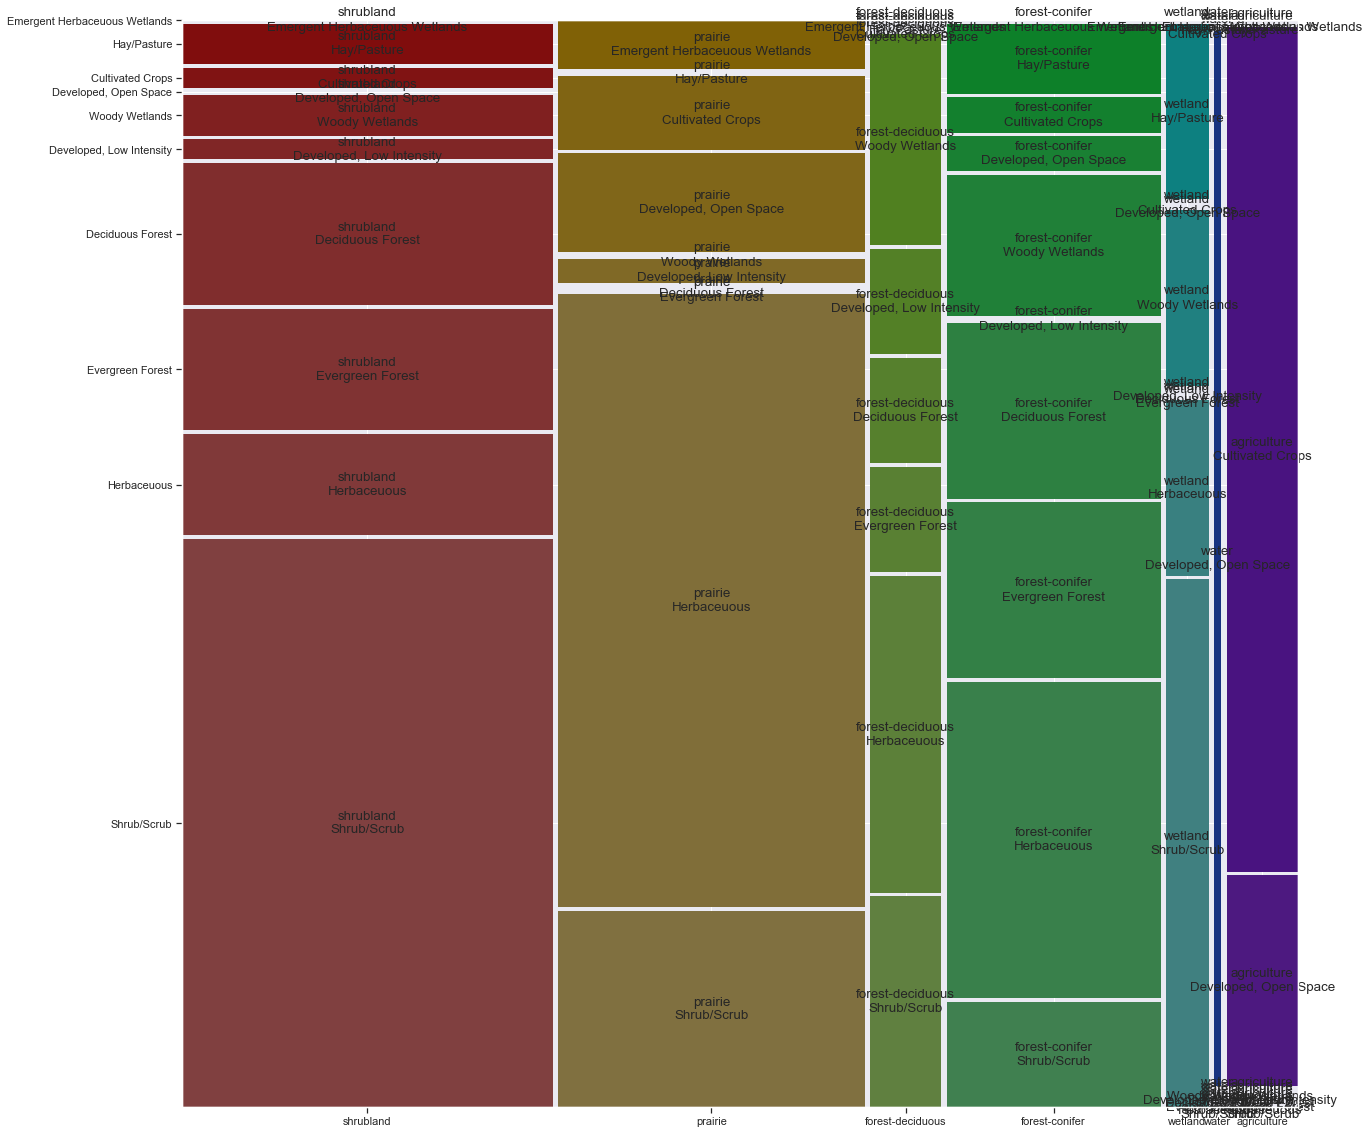

In [22]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

i = table4.nlcd.sort_values().unique()
mosaic(table4, ['Broad Habitat Type', 'nlcd_label'], horizontal=True);